In [1]:
%load_ext autoreload
%autoreload 2

# Import

In [2]:
import pickle
from os.path import join
import numpy as np
import seaborn as sns
from settings import *
from tools import get_mids
from matplotlib.colors import LogNorm
from scipy.stats import norm
from scipy.interpolate import RegularGridInterpolator

from resolution import (
    artificial_eres,
    fit_eres_params,
    smooth_eres_fit_params,
    comb,
    g_norm,
    double_erf,
)


# Load resolution baseline

In [3]:
with open(join(BASEPATH, "local/Eres_mephistograms.pckl"), "rb") as f:
    all_E_histos = pickle.load(f)

In [4]:
all_E_histos.keys()

dict_keys(['dec--50.0', 'dec-0.0', 'dec-50.0'])

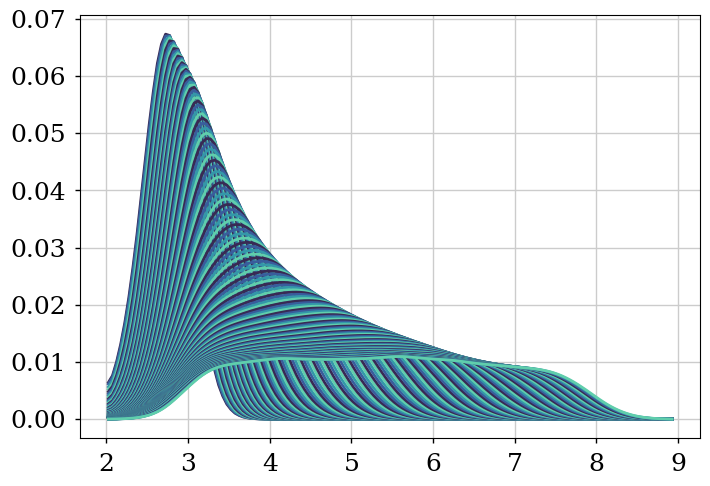

In [6]:
eres_up_mh = all_E_histos['dec-0.0'] + all_E_histos['dec-50.0']
eres_up_mh.normalize()
step = 1  
sns.set_palette("icefire", n_colors=eres_up_mh.shape[1] // step + 1)

_ = plt.plot(eres_up_mh.bin_mids[0], eres_up_mh.histo)

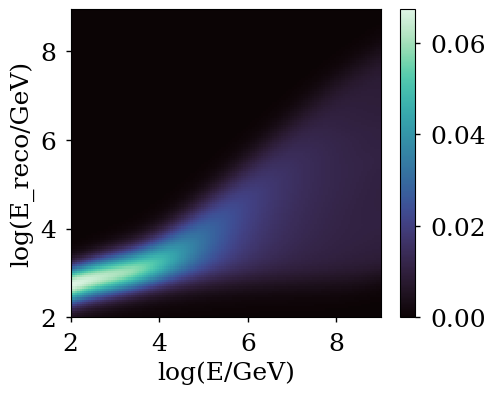

In [7]:
eres_up_mh.T().plot()
plt.colorbar()

# Parameterize the smearing matrix

In [8]:
from resolution import fit_eres_params

In [9]:
fit_params = fit_eres_params(eres_up_mh)

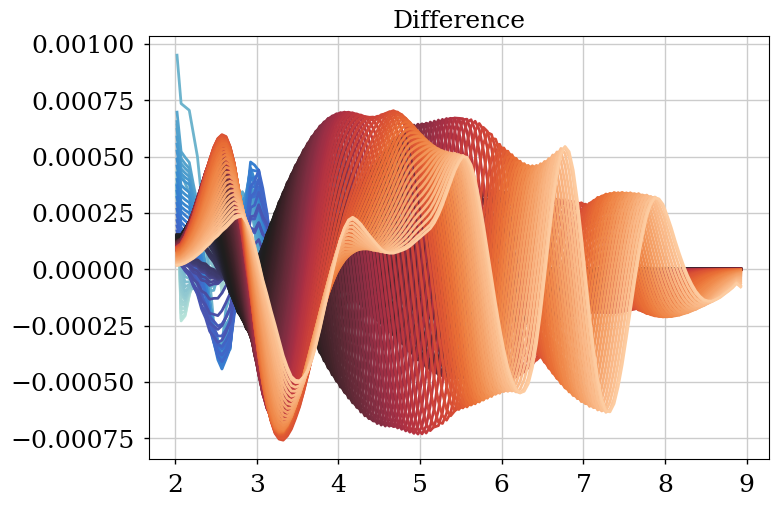

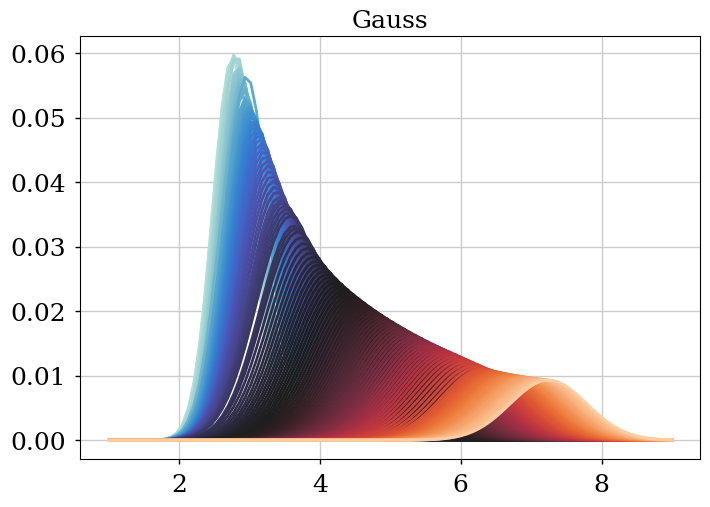

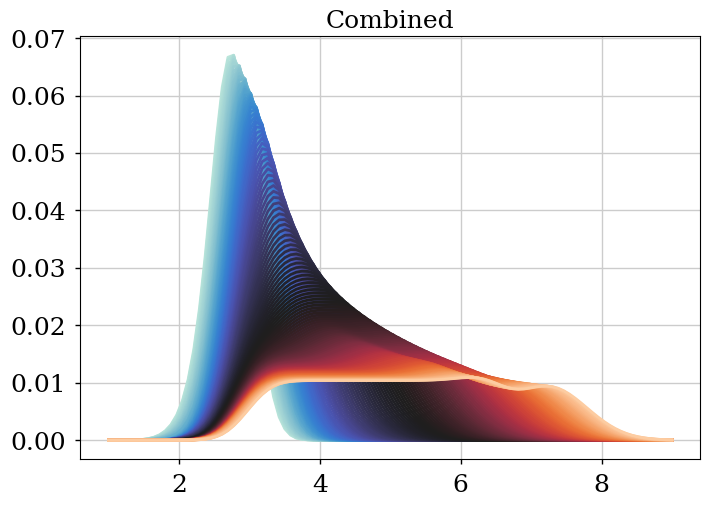

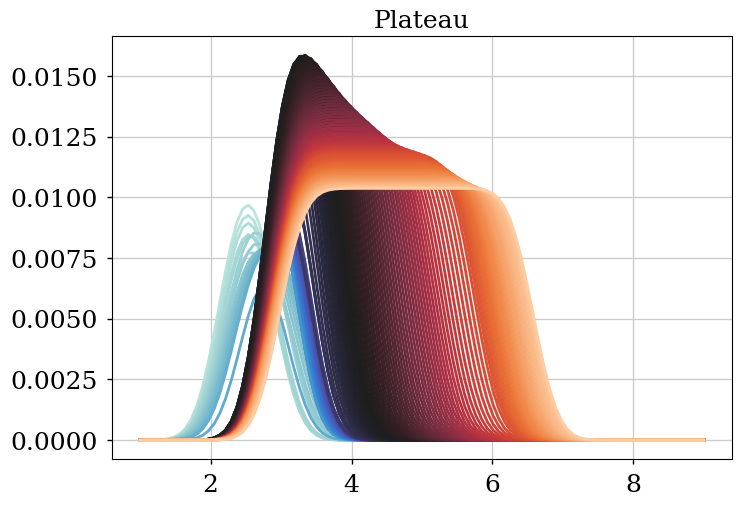

In [10]:
xvals = np.linspace(1, 9, num=100)
for ii, et in enumerate(eres_up_mh.bin_mids[1][::step]):
    cur_params = list(fit_params[ii])
    plt.figure(-1)
    plt.title("Difference")
    p = plt.plot(
        eres_up_mh.bin_mids[0],
        eres_up_mh.histo[:, ii] - comb(eres_up_mh.bin_mids[0], *cur_params),
    )
    plt.figure(1)
    plt.title("Gauss")
    plt.plot(
        xvals,
        g_norm(xvals, *cur_params[-3:]),
        color=p[0].get_color(),
        lw=2,
    )
    plt.figure(2)
    plt.title("Combined")
    plt.plot(
        xvals,
        comb(xvals, *cur_params),
        color=p[0].get_color(),
        lw=2,
        zorder=10,
    )
    plt.figure(3)
    plt.title("Plateau")
    plt.plot(
        xvals,
        double_erf(xvals, *cur_params[:-3]),
        color=p[0].get_color(),
        lw=2,
    )


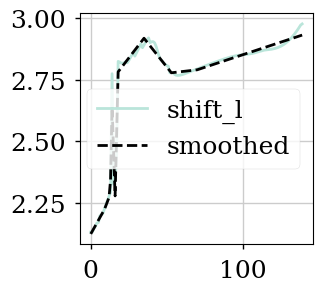

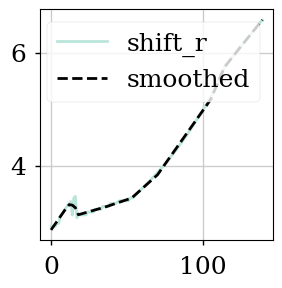

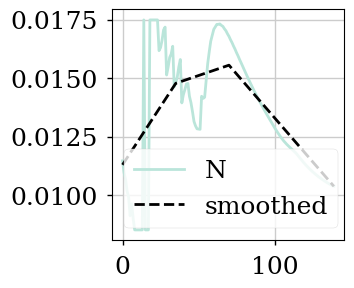

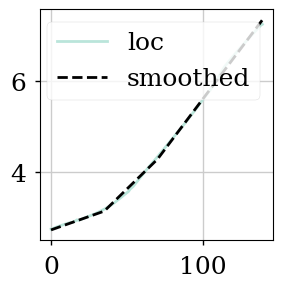

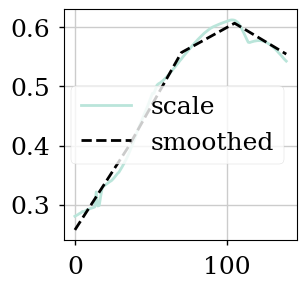

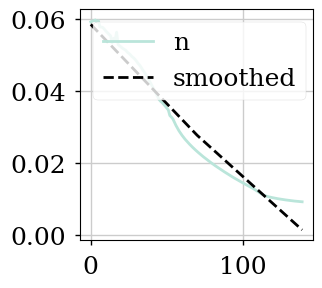

In [42]:
smoothed_fit_params = smooth_eres_fit_params(fit_params, eres_up_mh.bin_mids[1])

for n in fit_params.dtype.names:
    plt.figure(figsize=(3,3))
    p = plt.plot(fit_params[n], label=n)
    p = plt.plot(smoothed_fit_params[n], label="smoothed", color="k", ls="--")
    plt.legend()

# Artificial smearing matrix

## Best reproduction

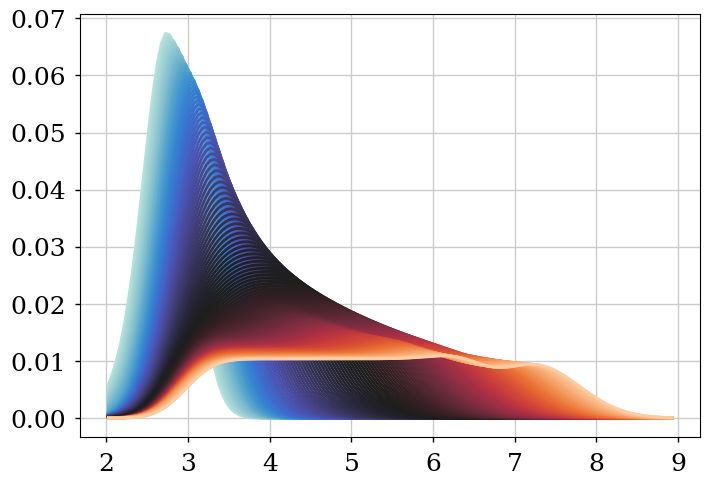

In [43]:
artificial_2D = artificial_eres(fit_params, *eres_up_mh.bins)
artificial_2D.axis_names = eres_up_mh.axis_names
_ = plt.plot(artificial_2D.bin_mids[0], artificial_2D.histo)


Text(0.5, 1.0, 'Artificial E-smearing')

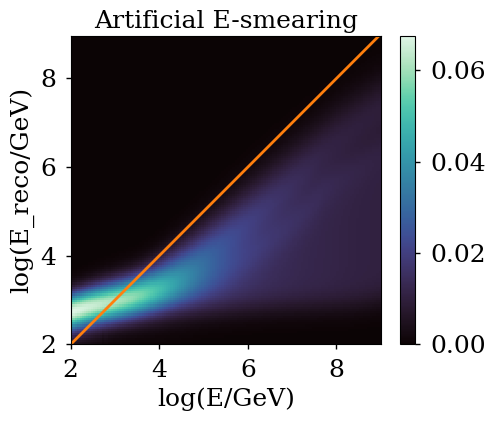

In [44]:
artificial_2D.T().plot()
plt.plot([E_MIN, E_MAX], [E_MIN, E_MAX], color="tab:orange")
plt.colorbar()
plt.title("Artificial E-smearing")


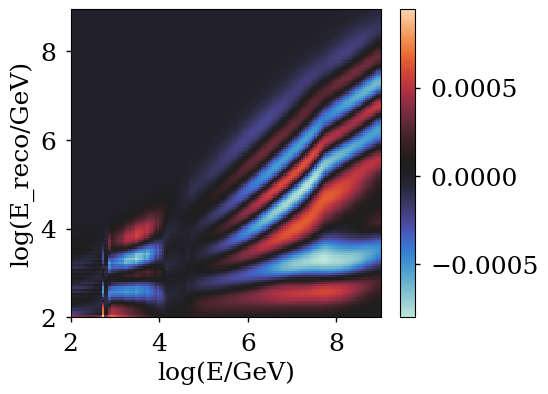

In [45]:
(eres_up_mh - artificial_2D).T().plot(cmap="icefire")
plt.colorbar()

In [46]:
with open(join(BASEPATH, "local/artificial_energy_smearing_MH_up.pckl"), "wb") as f:
    pickle.dump(artificial_2D, f)


## 1:1 reco reproduction

In [47]:
from resolution import one2one_eres

In [48]:
artificial_one2one = one2one_eres(fit_params, *eres_up_mh.bins)
artificial_one2one.axis_names = eres_up_mh.axis_names

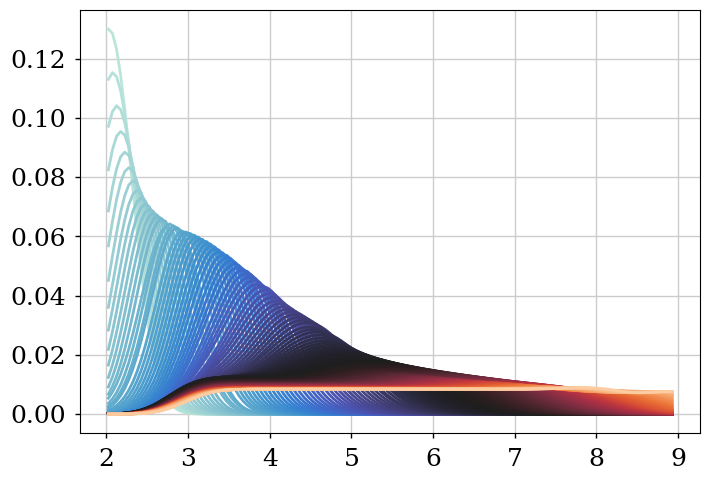

In [49]:
_ = plt.plot(artificial_one2one.bin_mids[0], artificial_one2one.histo)

Text(0.5, 1.0, 'Artificial E-smearing 1:1')

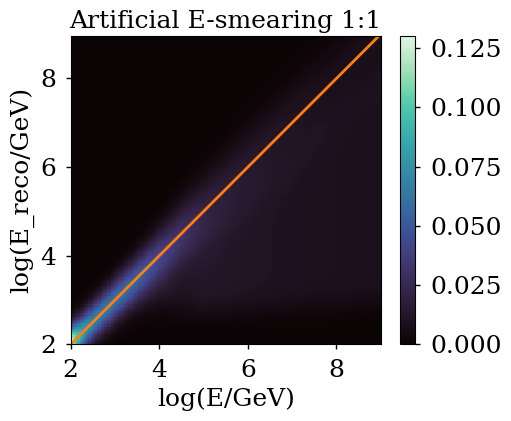

In [50]:
artificial_one2one.T().plot()
plt.plot([E_MIN, E_MAX], [E_MIN, E_MAX], color="tab:orange")
plt.colorbar()
plt.title("Artificial E-smearing 1:1")


In [51]:
with open(join(BASEPATH, "local/idealized_artificial_energy_smearing_MH_up.pckl"), "wb") as f:
    pickle.dump(artificial_one2one, f)

## Improved artificial energy smearing

In [53]:
from resolution import improved_eres

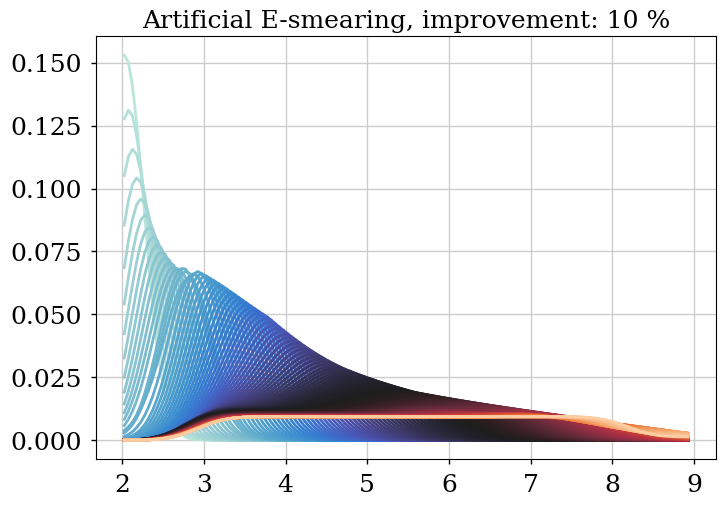

<Figure size 800x550 with 0 Axes>

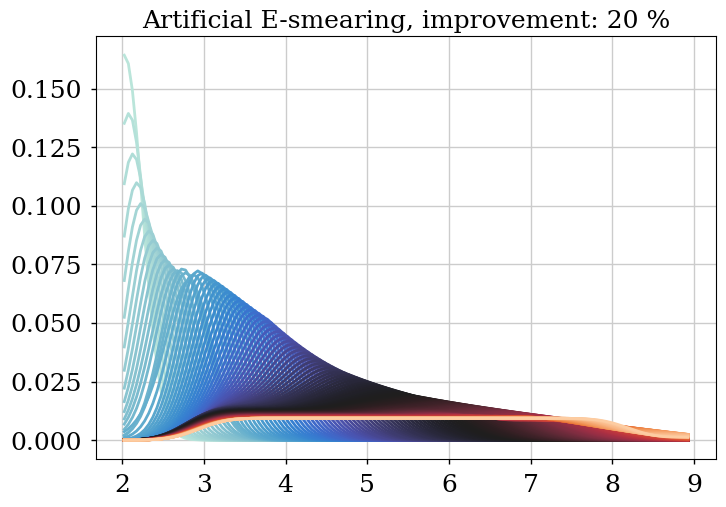

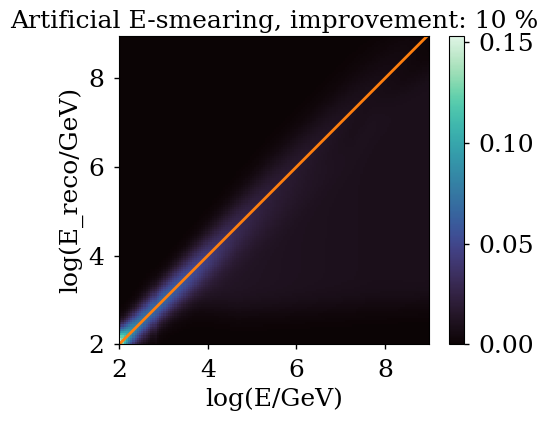

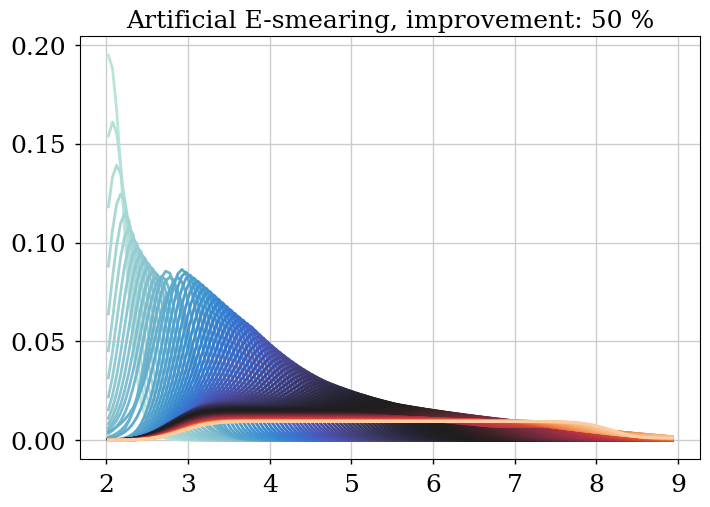

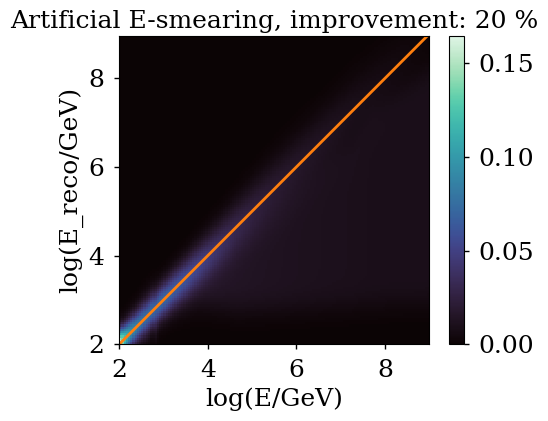

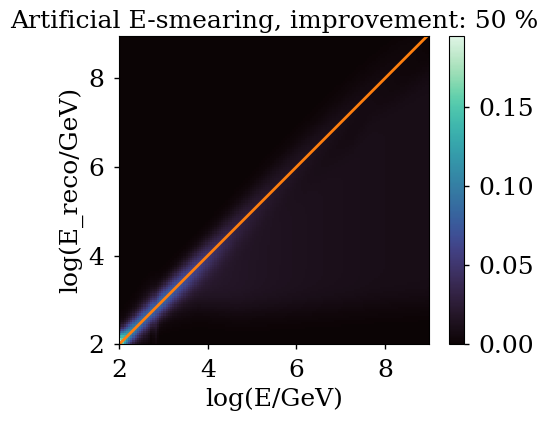

In [55]:
for ii, impro_factor in enumerate([0.1, 0.2, 0.5]):

    artificial_2D_impro = improved_eres(
        impro_factor, smoothed_fit_params, *eres_up_mh.bins
    )
    artificial_2D_impro.axis_names = eres_up_mh.axis_names
    plt.figure(ii)
    plt.title(f"Artificial E-smearing, improvement: {impro_factor*100:1.0f} %")
    _ = plt.plot(artificial_2D_impro.bin_mids[0], artificial_2D_impro.histo)

    plt.figure(ii + 20)
    artificial_2D_impro.T().plot()
    plt.plot([E_MIN, E_MAX], [E_MIN, E_MAX], color="tab:orange")
    plt.colorbar()
    plt.title(f"Artificial E-smearing, improvement: {impro_factor*100:1.0f} %")

    if True:
        with open(
            join(
                BASEPATH,
                f"local/improved_{impro_factor}_artificial_energy_smearing_MH_up.pckl",
            ),
            "wb",
        ) as f:
            pickle.dump(artificial_2D_impro, f)


In [ ]:
raise BaseException(":)")

BaseException: :)

# UHE energy smearing
-- not yet updated --

## binning

In [ ]:
bin_size = 0.1
logE_min = 7.
logE_bins_HE = np.arange(7.5, 13, step=bin_size)
logE_mids_HE = get_mids(logE_bins_HE)
logE_reco_bins_HE = np.arange(logE_min, 13.5, step=bin_size)
logE_reco_mids_HE = get_mids(logE_reco_bins_HE)
hee, hrr = np.meshgrid(logE_mids_HE, logE_reco_mids_HE)

## calculation

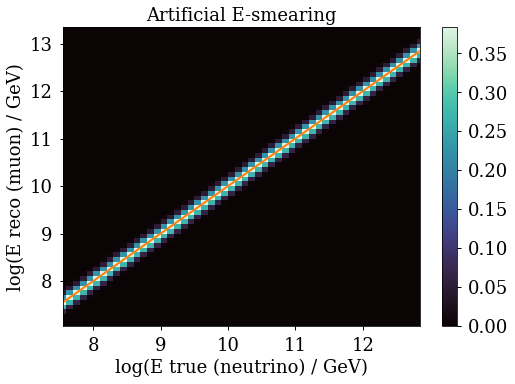

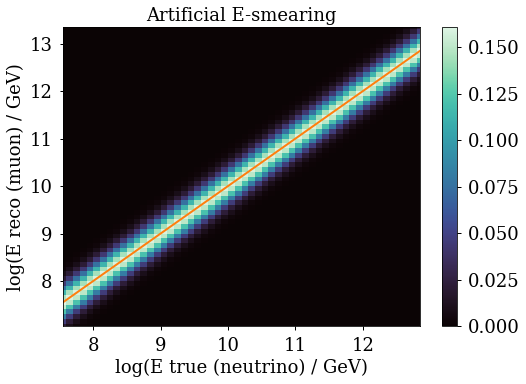

In [ ]:
for res in [0.1, 0.25]:
    dx = logE_reco_bins_HE[1] - logE_reco_bins_HE[0]
    HE_2D = []
    sigma_S = sigma_N = res  # energy resolution in log10(E)

    for e_t in logE_mids_HE:
        mu_N = e_t
        # energy resolution of the muon in log(E)
        # and slope shape
        shift_r = mu_N - sigma_S
        shift_l = mu_N + np.log10(1 - 0.2) # modeling mean inelasticity y ~ 20% at E=10⁹ GeV

        norbert = norm.pdf(logE_reco_mids_HE, loc=mu_N, scale=sigma_N)
        # normalize such that the plateau is half as high as the gauss
        siggi_norm = norm.pdf(mu_N, loc=mu_N, scale=sigma_N) / 2
        siggi = double_erf(logE_reco_mids_HE, shift_l, shift_r, sigma_S)
        siggi *= siggi_norm

        combined = siggi + norbert
        combined /= np.sum(combined * dx)  # normalize
        HE_2D.append(combined)
    HE_2D = np.array(HE_2D).T
    HE_2D /= np.sum(HE_2D, axis=0)

    plt.figure()
    plt.pcolormesh(hee, hrr, HE_2D)
    plt.ylim(np.min(hrr), np.max(hrr))
    plt.xlim(np.min(hee), np.max(hee))
    plt.plot([6, 13], [6, 13], color="tab:orange")
    plt.colorbar()
    plt.title("Artificial E-smearing")
    plt.ylabel("log(E reco (muon) / GeV)")
    plt.xlabel("log(E true (neutrino) / GeV)")

    ## save
    with open(f"../local/HE_energy_smearing_kde_{int(res*100)}-res.pckl", "wb") as f:
        pickle.dump((HE_2D, logE_reco_bins_HE), f)

    rgi = RegularGridInterpolator((logE_reco_mids_HE, logE_mids_HE), HE_2D)
    with open(f"../local/HE_energy_smearing_rgi_{int(res*100)}-res.pckl", "wb") as f:
        pickle.dump(rgi, f)

    with open(f"../local/HE_energy_smearing_2D_{int(res*100)}-res.pckl", "wb") as f:
        pickle.dump((HE_2D, logE_bins_HE, logE_reco_bins_HE), f)

# Check & Plot

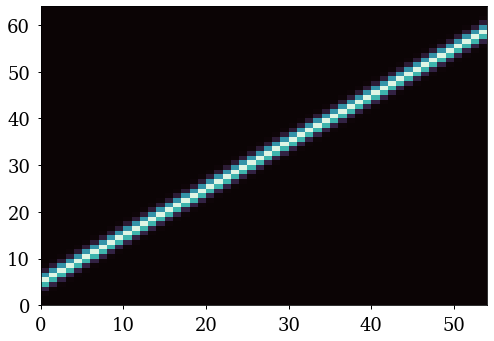

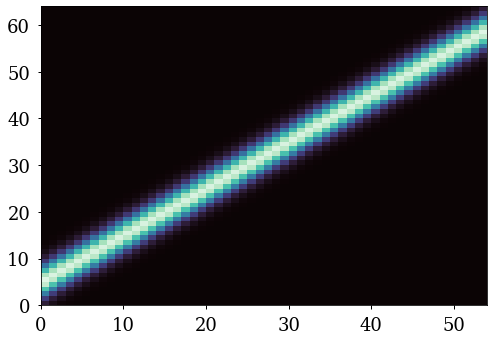

In [ ]:
# energy smearing matrix
with open("../local/HE_energy_smearing_2D_10-res.pckl", "rb") as f:
    HE_2D, logE_bins_HE, logE_reco_bins_HE = pickle.load(f)

plt.figure()
plt.pcolormesh(HE_2D)

# energy smearing matrix
with open("../local/HE_energy_smearing_2D_25-res.pckl", "rb") as f:
    HE_2D, logE_bins_HE, logE_reco_bins_HE = pickle.load(f)

plt.figure()
plt.pcolormesh(HE_2D)


In [ ]:
# energy smearing matrix
with open("../local/energy_smearing_rgi.pckl", "rb") as f:
    rgi = pickle.load(f)
# new binning
logE_reco_bins = np.arange(1.9, 9.05, step=0.05)
logE_reco_mids = get_mids(logE_reco_bins)
lge_grid, lre_grid = np.meshgrid(logE_mids, logE_reco_mids)
# baseline evaluation
normed_kvals_up = rgi((lre_grid, lge_grid))

# normalize per bin in true energy
normed_kvals_up = normed_kvals_up / np.sum(normed_kvals_up, axis=0)

# artificial, improved smearing matrix
with open("../local/improved_0.5_artificial_energy_smearing_rgi.pckl", "rb") as f:
    rgi = pickle.load(f)
artificial_normed_kvals = rgi((lre_grid, lge_grid))
# normalize per bin in true energy
artificial_normed_kvals = artificial_normed_kvals / np.sum(
    artificial_normed_kvals, axis=0
)


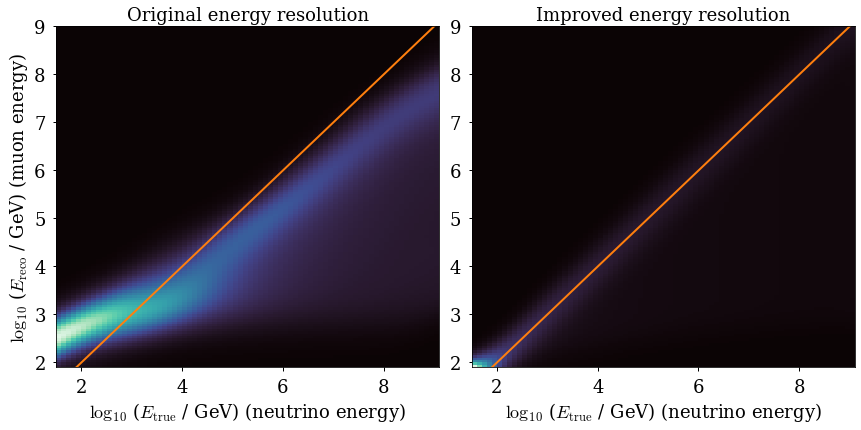

In [ ]:
# logE_mids are the same as for effective area binning
f, axes = plt.subplots(ncols=2, figsize=(12, 6))

axes[0].grid(False)
axes[0].pcolormesh(logE_bins, logE_reco_bins, normed_kvals_up)
# f.colorbar()
axes[0].plot([1, 10], [1, 10], color="tab:orange")
axes[0].set_ylim(np.min(logE_reco_bins), np.max(logE_reco_bins))
axes[0].set_xlim(np.min(logE_bins), np.max(logE_bins))
axes[0].set_title("Original energy resolution")
axes[0].set_ylabel(r"$\log_{10}$ ($E_{\rm reco}$ / GeV) (muon energy)")
axes[0].set_xlabel(r"$\log_{10}$ ($E_{\rm true}$ / GeV) (neutrino energy)")

## Artificial
axes[1].grid(False)
axes[1].pcolormesh(logE_bins, logE_reco_bins, artificial_normed_kvals)
# f.colorbar()
axes[1].plot([1, 10], [1, 10], color="tab:orange")
axes[1].set_ylim(np.min(logE_reco_bins), np.max(logE_reco_bins))
axes[1].set_xlim(np.min(logE_bins), np.max(logE_bins))
axes[1].set_title("Improved energy resolution")
# axes[1].set_ylabel(r"$\log_{10}$ ($E_{\rm reco}$ / GeV) (muon energy)")
axes[1].set_xlabel(r"$\log_{10}$ ($E_{\rm true}$ / GeV) (neutrino energy)")
f.tight_layout()
f.savefig("../plots/energy_resolution_comparison.pdf", bbox_inches="tight")
